In [ ]:
#neural network classification with pytorch, we want to predict if something is one or another and there may be a lot of options for the other


In [ ]:
#1. Data
#we can start with data already available or make our own

import sklearn
from sklearn.datasets import make_circles

In [ ]:
#we make  100 samples
n_samples = 1000

#create circles
X, y = make_circles(n_samples, noise = 0.03, random_state =42)

len(X), len(y)


(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
#make a dataframe of circl data

import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


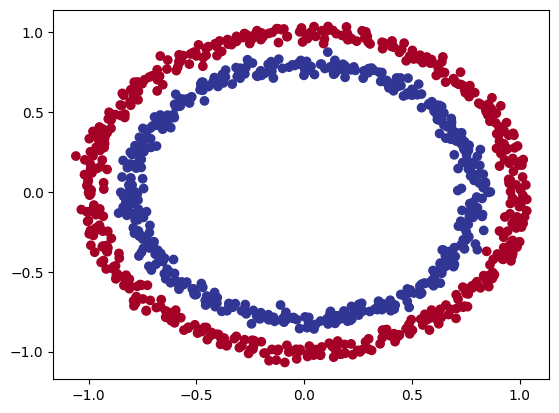

In [ ]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

# given two coordinates: x1,x2 we want to predict if the point is blue or red

In [ ]:
# check inout and output shape

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#view the first example of feature and labels

X_sample = X[0]
y_sample  = y[0]

print(f"values for one sample of X: {X_sample}, and the same for y: {y_sample}")
#it's two features for x to predict one label y

values for one sample of X: [0.75424625 0.23148074], and the same for y: 1


In [ ]:
# turn data into tensors and create train and test split

#turn data into tensors

import torch
type(X)
#we need to change the type as well
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)




In [ ]:
#split data into test and training data
#we can perform a random split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42) #the order of the output is defined for the function

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
# Build a model

#we need a model to classify the blue and red dots
#we need:
#1. setup device agnostic code
#2. construct a  model by subclassing nn.Module
#3. define a loss function and optimizer
#4. create a training and test loop

In [ ]:
import torch
from torch import nn

#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#we create a model that is
#1. subclassing nn.Module
#2. create two nn.Linear() layers that are capable of handling the shapes of our data
#3 we want to define a forward method
#4 instatiate an instance of our model and send it to the target

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    #create two nn.linear layer that are able to manage the shape of our input which is two features for each x
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1 ) #the in feature should match with the output of the previous layer, it is 1 as the label size

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x goes into layer 1, and layer 1 goes into layer 2


model_0 = CircleModel().to(device)
model_0
#notice, if you have same amount of two class, than with binary classification, with random guess you will get a loss of 0.5, doesn't get better

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
#let's replicate the model above using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1 )
).to(device)
model_0

#we can put this code in the function instead af all the other option

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1782, -0.0922],
                      [-0.0986, -0.1717],
                      [ 0.6897,  0.5947],
                      [-0.4122,  0.3056],
                      [-0.5890, -0.5674]])),
             ('0.bias', tensor([-0.3961, -0.0502,  0.0131,  0.5934, -0.0200])),
             ('1.weight',
              tensor([[ 0.3751,  0.3117, -0.4292, -0.1670, -0.2070]])),
             ('1.bias', tensor([0.4291]))])

In [ ]:
#make predictions
with torch.inference_mode():
  untrained_pred = model_0(X_test)
print(f"Length of predictions: {len(untrained_pred)}, shape: {untrained_pred.shape}")
print(f" Length of test samples: {len(X_test)}, shape : {X_test.shape}")
print(f" First 10 predictions: {torch.round(untrained_pred [:10])}")
print(f" First 10 labels: {y_test [:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
 Length of test samples: 200, shape : torch.Size([200, 2])
 First 10 predictions: tensor([[0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.]])
 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#setting a loss function and optimizer
#Which should we use? for regression we used the MAE, MSE, for classification we may use BInary cross entropy ot ccategorical cross entropy
#for optimizer we may use SGD or Adam but pytorch has a lot of built in

In [ ]:
#set up a loss function
#loss_fn = nn.BCELoss() #requires the input to have gone trought the sigmoid activation before using it
#it should be as:
#nn.Sequential(
 #   nn.Sigmoid(),
  #  nn.BCLoss()
#)
#to be equal to the following
loss_fn = nn.BCEWithLogitsLoss() #it has the sigmoid activation function built in, we use this one since it's more numerically stable

In [ ]:
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

In [ ]:
#let's calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = correct / len(y_pred) * 100
  return accuracy

## Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**. we can convert the logits into **prediction probabilities** by passing them through an activation function like sigmoid for binary classification and softmax for multiclass clasiification.

Then we can convert the prediction probabilities into **prediction labels** by either rounding them or taking the argmax()

In [ ]:
#view the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
 y_logits = model_0(X_test)[:5]
y_logits

tensor([[ 0.0011],
        [-0.1028],
        [ 0.3000],
        [-0.0838],
        [ 0.3424]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
#we need to transform the y_logits into the same shape of the labels y_test to be able to make a comparison
#we use a sigmoid activation function on the logits. they are turn into prediction probabilties
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5003],
        [0.4743],
        [0.5744],
        [0.4791],
        [0.5848]])

In [ ]:
#for our prediction probabilities values, we need to perform a range style rounding on them:
#y_pred_probs >= 0.5 Y=1 class 1
#y_pred_probs < 0.5 y=0 class 0

In [ ]:
#find the predicted labels from
y_preds = torch.round(y_pred_probs) #with this final step we have the same format as the y_test

#in full(logits to pred probs to pred labels) , #we do this step because
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test))[:5])

#check equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#get rid of extra dimensio
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 0., 1., 0., 1.])

In [ ]:
# let's  TRAIN THE MODEL
#set seed for reproducibility
torch.manual_seed(42)

#set number of epochs
epochs = 100
for epoch in range(epochs):
  #train model_0
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turns logits into pred_probs into pred_labels

  #2 loss and accuracy
  loss = loss_fn (y_logits,y_train) #the loss we used expects logits

  acc = accuracy_fn (y_true= y_train, y_pred = y_pred)

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4 loss backward
  loss.backward()

  #5 optimizer step
  optimizer.step()

#testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  if epoch %10 ==0:
    print(f"epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")


epoch: 0 | Loss: 0.70245, Acc: 53.00% | test loss: 0.69325, test acc: 53.50%
epoch: 10 | Loss: 0.69883, Acc: 51.62% | test loss: 0.69166, test acc: 54.50%
epoch: 20 | Loss: 0.69698, Acc: 50.38% | test loss: 0.69129, test acc: 55.00%
epoch: 30 | Loss: 0.69592, Acc: 50.25% | test loss: 0.69137, test acc: 53.50%
epoch: 40 | Loss: 0.69524, Acc: 50.12% | test loss: 0.69160, test acc: 52.00%
epoch: 50 | Loss: 0.69477, Acc: 50.38% | test loss: 0.69188, test acc: 50.50%
epoch: 60 | Loss: 0.69443, Acc: 50.00% | test loss: 0.69216, test acc: 50.50%
epoch: 70 | Loss: 0.69417, Acc: 50.50% | test loss: 0.69242, test acc: 50.00%
epoch: 80 | Loss: 0.69397, Acc: 51.25% | test loss: 0.69265, test acc: 47.50%
epoch: 90 | Loss: 0.69381, Acc: 50.38% | test loss: 0.69286, test acc: 49.00%


In [ ]:
# the model gives an accuracy of 47% which is as if it's guessing
#make predictions and evaluate the model and visualize

#to do so we are going to import a function called plot_decision_library

import requests
from pathlib import Path
#downlaod helper functios from pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  #we are creating a file into which we write the content of the request variable
   f.write(request.content)


Download helper_functions.py


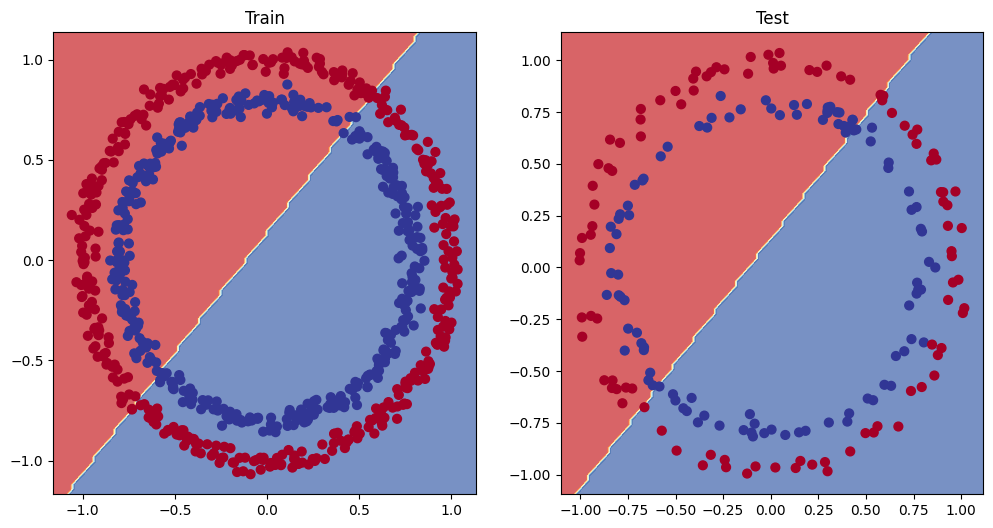

In [ ]:
#plot the decision boundary of the model
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#the model is using linear layers, so it is trying to separate the blue and red dots using a line which is not the best way

# Improving a model (from model perspective)
* give the modelmore layers, so give a chance to the model to learn about patterns in data
* add more hidden units , so go from 5 to 10 hidden units, because the more parameters the model has the more chance it has to learn
* fit for longer, increase epochs
* changing the activtion functions
* change the learning late, amount the optimizer will change the parameters
* change the loss function

This options are all from a model perspective because they deal directly with the model and not the data.

In [ ]:
#we improve the model by: adding more hidden units 5-> 10 and increaseing hte number of layers 2 ->3, and increasing the number of epochs 100-> 1000

class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10 )
    self.layer_2 = nn.Linear( in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    #z = self.layer_1(x) #z is the variable for logits
    #z = self.layer_2(x)
    #z = self.layer_3(x)
    #return z
    # or we could to to speed up:
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
#create an instance

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)

#create a training and testing loop
torch.manual_seed(42)
epochs =1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
for epoch in range(epochs):
  model_1.train()
  y_logis = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn (y_logits, y_train)
  acc= accuracy_fn(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_logits= model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn ( test_logits, y_test)
    test_acc = accuracy_fn (y_true = y_test, y_pred = test_pred)

  if epoch%100 == 0:
      print(f"epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%")


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

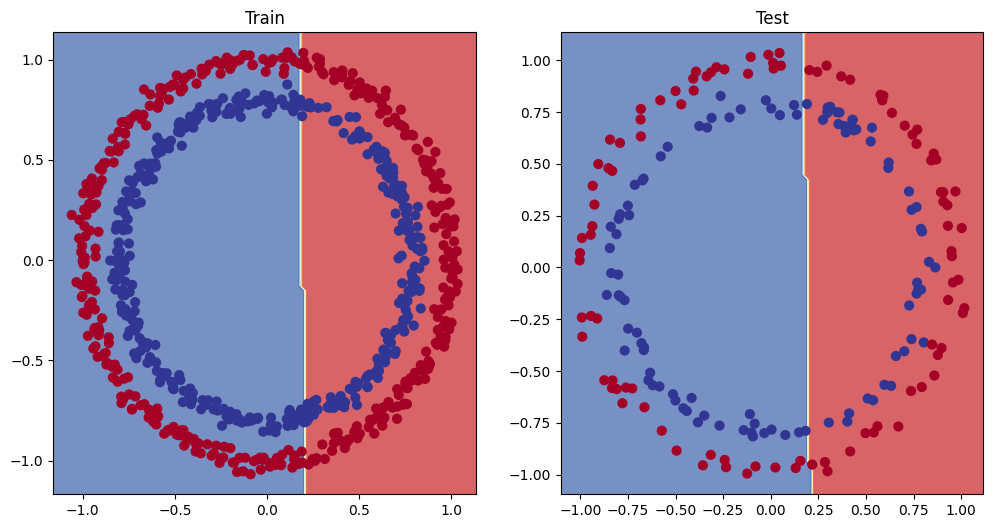

In [ ]:
#plot the decision boundary of the model


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


In [ ]:
#preparing data to see if a model can fit a straight line


Preparing data to see if a model can fit a straight line

One way to troubleshoot a model is to see if it works on a smaller problem.

In [ ]:
#we create some data (same as notebook 1)
weight = 0.7   #it's b
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [ ]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

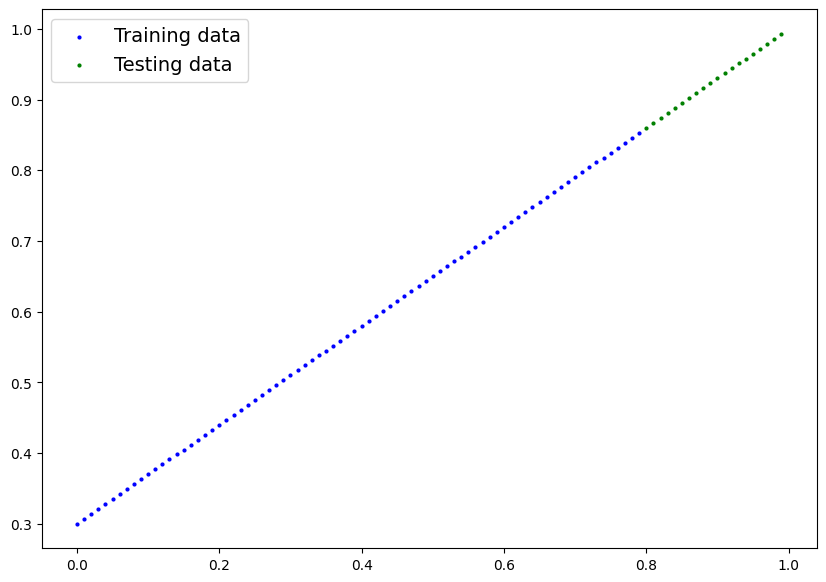

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [ ]:
### Adjusting model_1 to fit a straight line
#here we have one feature for x and one feature for y

model_2 = nn.Sequential(
    nn.Linear(in_features= 1, out_features = 10),
    nn.Linear(in_features= 10, out_features = 10),
    nn.Linear(in_features= 10, out_features = 1)

).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.1)


In [ ]:
torch.manual_seed(42)

epochs = 1000

#put data on the target device, we need to put the data in the same device  as the model
X_train_regression , y_train_regression = X_train_regression.to (device), y_train_regression.to (device)
X_test_regression , y_test_regression = X_test_regression.to (device), y_test_regression.to (device)


for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss= loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


In [ ]:
#make predictions

model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

# Non Linearity
What patterns could you draw if you were given an infinite amount of a straight and non straight lines? or in machine leanring terms an infinite (but really is finite) amount of linear and non linear functions?

Recreate non linear data (red an blue dots)

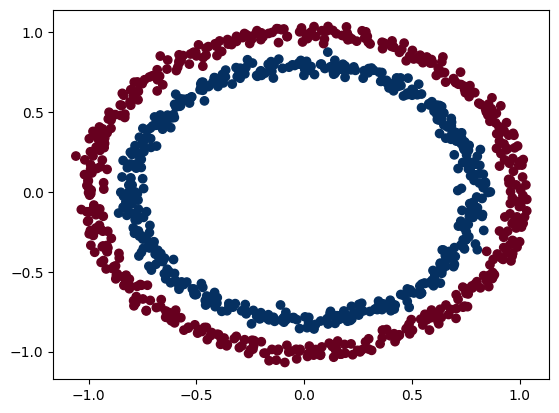

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
#split into train and test data
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]


TypeError: expected np.ndarray (got Tensor)

In [ ]:
#let's build a model with non linearity
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10),
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear (in_features = 10, out_features = 1 )
    self.relu = nn.ReLU() #non linear activation function

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)


In [ ]:
#random seed
torch.manual_seed(42)
#put all in the target device, setting device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):

    model_3.train()

    y_logits= model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

TypeError: 'tuple' object is not callable

In [ ]:
#evaluate a model trained with non linear activation function
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

TypeError: 'tuple' object is not callable

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity